<a href="https://colab.research.google.com/github/sonjamihajlovic/Machine-learning/blob/main/Projekat_IN33_IN55_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obrada podataka


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

 - Učitavanje podataka iz baze

In [ ]:
df = pd.read_csv('ObesityDataSet.csv')
df.shape

(2111, 17)

In [ ]:
print("\n types:\n", df.dtypes, "\n")
df.head()


 types:
 Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object 



,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


- Ispis podataka

In [ ]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


- Prebrojavanje klasa u okviru obeležja na osnovu kog se vrši klasifikacija

In [ ]:
classes = df['NObeyesdad'].unique()
broj_klasa = len(classes)

print(f'Jedinstvene vrednosti u ciljnoj promenljivoj: {classes}')
print(f'Broj klasa: {broj_klasa}')

Jedinstvene vrednosti u ciljnoj promenljivoj: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']
Broj klasa: 7


 - Statističke vrednosti za sve numeričke varijable

In [ ]:
print(df.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

 - Identifikacija numeričkih obeležja u bazi

In [ ]:
numericka_obelezja = df.select_dtypes(include=['number']).columns

broj_numerickih_obelezja = len(numericka_obelezja)

print(f"Broj numeričkih obeležja u bazi je: {broj_numerickih_obelezja}")
print("Numerička obeležja su:")
print(numericka_obelezja)

Broj numeričkih obeležja u bazi je: 8
Numerička obeležja su:
Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


 - Ispis kategoričkih obeležja

In [ ]:
kategoricka_obelezja = df.select_dtypes(include=['object']).columns

print("kategoricka obeležja su:")
print(kategoricka_obelezja)

kategoricka obeležja su:
Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


- Raspodela uzoraka po klasama

In [ ]:
raspodela_klasa = df['NObeyesdad'].value_counts(normalize=True) * 100
raspodela_klasa = raspodela_klasa.round(2).astype(str) + '%'

print("Procentualna raspodela uzoraka po klasama:")
print(raspodela_klasa)

Procentualna raspodela uzoraka po klasama:
Obesity_Type_I         16.63%
Obesity_Type_III       15.35%
Obesity_Type_II        14.07%
Overweight_Level_I     13.74%
Overweight_Level_II    13.74%
Normal_Weight           13.6%
Insufficient_Weight    12.88%
Name: NObeyesdad, dtype: object


 - Raspodela pušača u dataset-u

In [ ]:
broj_pusaca = df['SMOKE'].value_counts().get('yes', 0)

print(f"U datasetu ima {broj_pusaca} pušača.")

U datasetu ima 44 pušača.


- Broj pušača po klasama

In [ ]:
pusaci = df[df['SMOKE'] == 'yes']

broj_pusaca_po_klasama = pusaci['NObeyesdad'].value_counts()

print("Broj pušača po klasama:")
print(broj_pusaca_po_klasama)

Broj pušača po klasama:
Obesity_Type_II        15
Normal_Weight          13
Obesity_Type_I          6
Overweight_Level_II     5
Overweight_Level_I      3
Obesity_Type_III        1
Insufficient_Weight     1
Name: NObeyesdad, dtype: int64


- Brisanje kolone "SMOKE"

In [ ]:
df = df.drop('SMOKE', axis=1)

broj_uzoraka, broj_obelezja = df.shape

print(f"Nakon brisanja kolone 'SMOKE', dataset ima {broj_uzoraka} uzoraka i {broj_obelezja} obelezja.")

Nakon brisanja kolone 'SMOKE', dataset ima 2111 uzoraka i 16 obelezja.


- Provera nedostajućih vrednosti u dataset-u

In [ ]:
nedostajuce_vrednosti = df.isnull().sum()
procentualni_nedostatak = (nedostajuce_vrednosti / len(df)) * 100

rezultati = pd.DataFrame({
    'Nedostajuće vrednosti': nedostajuce_vrednosti,
    'Procentualni nedostatak': procentualni_nedostatak
})

print("Nedostajuće vrednosti u bazi:")
print(rezultati)

Nedostajuće vrednosti u bazi:
                                Nedostajuće vrednosti  Procentualni nedostatak
Gender                                              0                      0.0
Age                                                 0                      0.0
Height                                              0                      0.0
Weight                                              0                      0.0
family_history_with_overweight                      0                      0.0
FAVC                                                0                      0.0
FCVC                                                0                      0.0
NCP                                                 0                      0.0
CAEC                                                0                      0.0
CH2O                                                0                      0.0
SCC                                                 0                      0.0
FAF                   

- Provera nevalidnih vrednosti za svako obeležje

In [ ]:
nevalidne_vrednosti = {}

for kolona in df.columns:
    nevalidne_vrednosti[kolona] = df[df[kolona].apply(lambda x: isinstance(x, (int, float))) == False]

print("Nevalidne vrednosti u bazi:")
for kolona, vrednosti in nevalidne_vrednosti.items():
    if not vrednosti.empty:
        print(f"{kolona}: {vrednosti}")

Nevalidne vrednosti u bazi:
Gender:       Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

   

- Analiza outlier-a

In [ ]:
numericka_obelezja = df.select_dtypes(include=['number'])

Q1 = numericka_obelezja.quantile(0.25)
Q3 = numericka_obelezja.quantile(0.75)
IQR = Q3 - Q1

autlajeri = ((numericka_obelezja < (Q1 - 1.5 * IQR)) | (numericka_obelezja > (Q3 + 1.5 * IQR))).any(axis=1)

print("Obelezja koja sadrze autlajere:")
print(df[autlajeri])

Obelezja koja sadrze autlajere:
      Gender        Age    Height      Weight family_history_with_overweight  \
4       Male  22.000000  1.780000   89.800000                             no   
13      Male  41.000000  1.800000   99.000000                             no   
14      Male  23.000000  1.770000   60.000000                            yes   
16      Male  27.000000  1.930000  102.000000                            yes   
17    Female  29.000000  1.530000   78.000000                             no   
...      ...        ...       ...         ...                            ...   
1794    Male  30.642430  1.653876  102.583895                            yes   
1795    Male  20.068432  1.657132  105.580491                            yes   
1796    Male  20.914366  1.644751  101.067988                            yes   
1797    Male  25.512048  1.660761  104.321463                            yes   
1798    Male  26.844812  1.691510  102.595180                            yes   

     FA

- Prikaz outlier-a putem boxplot dijagrama

<Axes: xlabel='Age'>

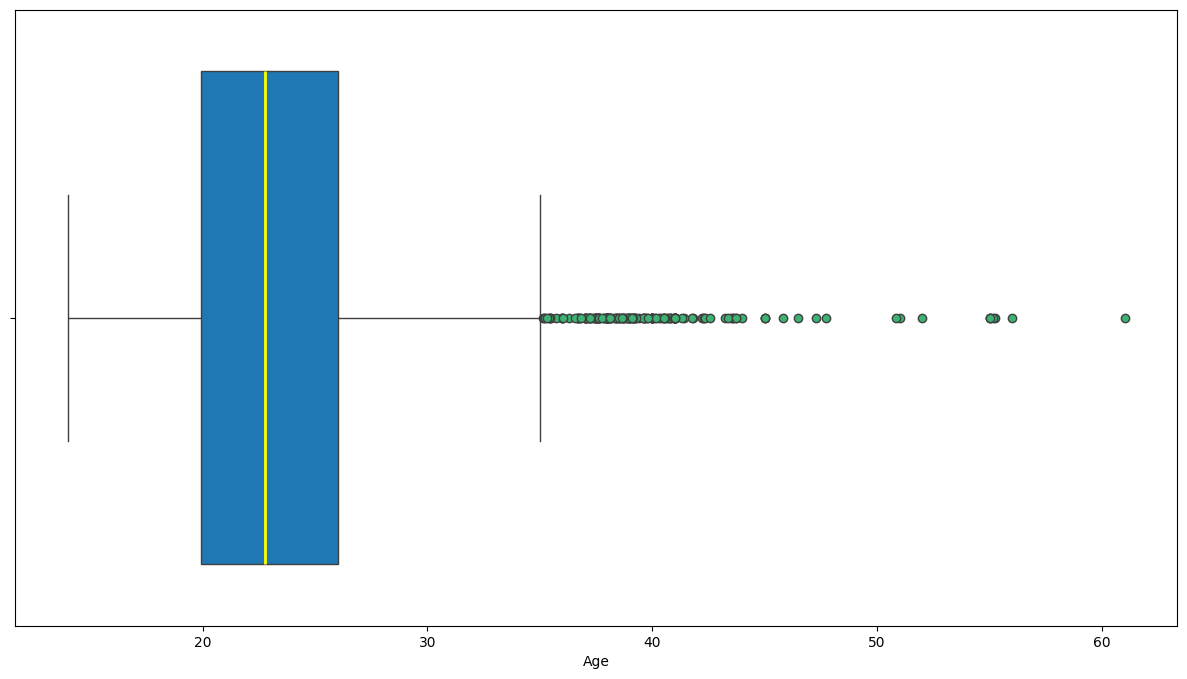

In [ ]:
plt.figure(figsize=(15, 8))
medianprops = dict(linestyle = '-', linewidth = 2, color = 'yellow')
sns.boxplot(x = df['Age'], saturation = 1, medianprops = medianprops, flierprops = {'markerfacecolor':'mediumseagreen'})

- Računanje matrice korelacije

In [ ]:
kolone = ['Age', 'Height', 'Weight']
podaci_za_korelaciju = df[kolone]
matrica_korelacije = podaci_za_korelaciju.corr()

# identifikacija parova sa korelacijom većom od 0.7
parovi_sa_visokom_korelacijom = []

for i in range(len(matrica_korelacije.columns)):
    for j in range(i + 1, len(matrica_korelacije.columns)):
        if abs(matrica_korelacije.iloc[i, j]) > 0.7:
            parovi_sa_visokom_korelacijom.append((matrica_korelacije.columns[i], matrica_korelacije.columns[j]))

print("Parovi obeležja sa korelacijom većom od 0.7:")
for par in parovi_sa_visokom_korelacijom:
    print(par)

Parovi obeležja sa korelacijom većom od 0.7:


- Prikaz matrice korelacije pomoću heatmap-a

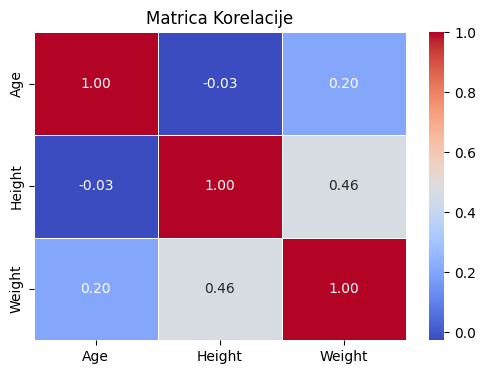

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(matrica_korelacije, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrica Korelacije')
plt.show()

- Iscrtavanje histogram-a numeričkih obeležja u odnosu na ciljnu promenljivu radi izdvajanja najdiskriminatornijeg obeležja

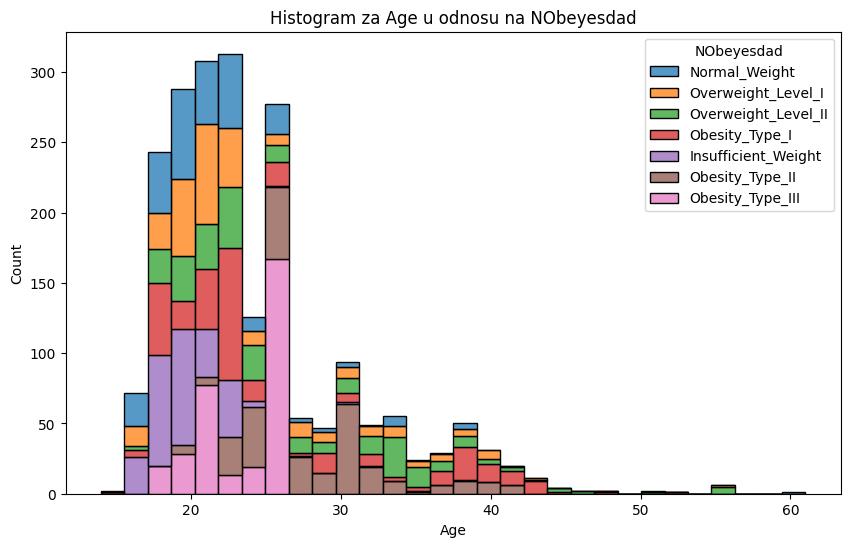

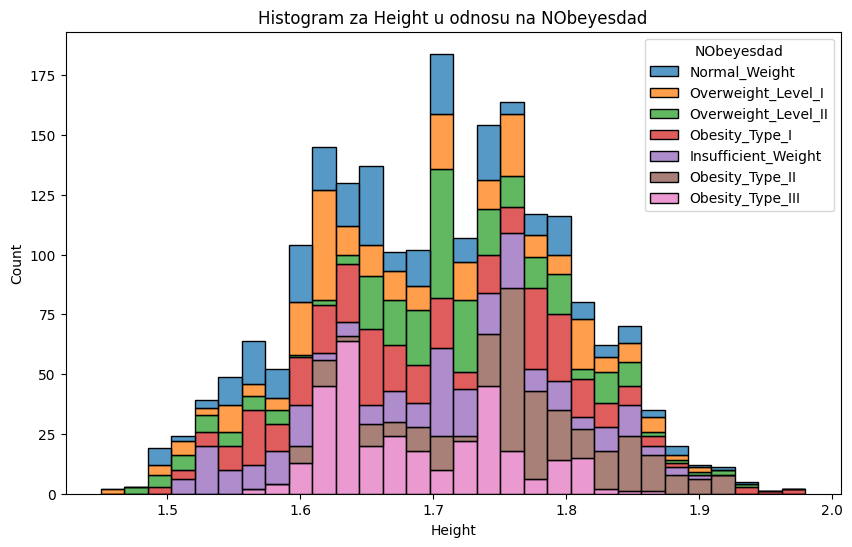

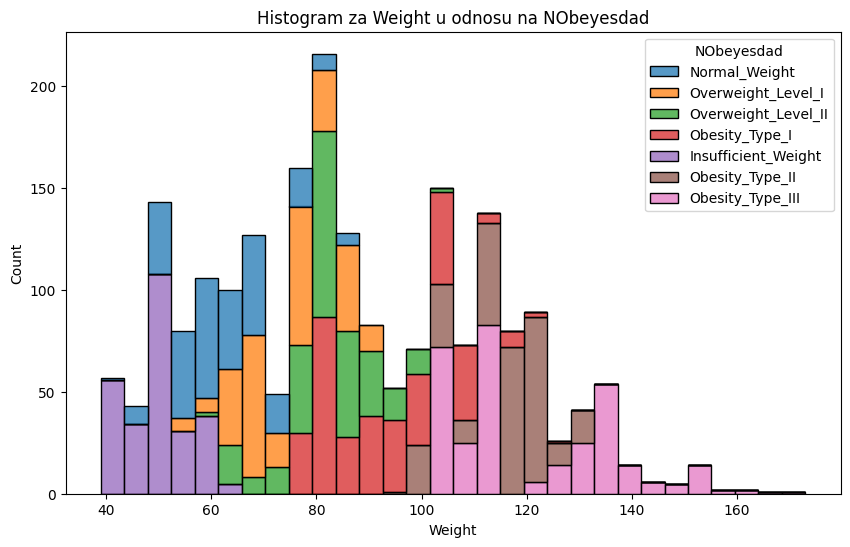

In [ ]:
numericka_obelezja = df[kolone]
ciljna_promenljiva = 'NObeyesdad'

for obelezje in numericka_obelezja.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df, x=obelezje, hue=ciljna_promenljiva, multiple="stack", bins=30)
    plt.title(f'Histogram za {obelezje} u odnosu na {ciljna_promenljiva}')
    plt.show()

# KNN algoritam

- Podela podataka na X (atributi) i y (ciljna promenljiva)

In [ ]:
X_original = df.copy() # pravimo kopiju originalnih podataka, koja ce nam koristiti u random forest algoritmu
y = df['NObeyesdad'] # izdvajamo 'NObeyesdad' obelezje kao ciljnu promenljivu

df.drop(['NObeyesdad'], axis=1, inplace=True)

# primena one-hot encoding-a na preostale kategoričke kolone, kako bismo napravile dummy promenljive
data_dummies = pd.get_dummies(df)
X = data_dummies

- Podela podataka na trening (90%) i test (10%) skupove

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10, stratify=y)

print("Dimenzije trening skupa X:", X_train.shape)
print("Dimenzije test skupa X:", X_test.shape)

Dimenzije trening skupa X: (1899, 29)
Dimenzije test skupa X: (212, 29)


- Grid pretraga za određivanje hiperparametara

In [ ]:
parameters = {'n_neighbors': [1, 5, 10, 20], 'metric': ('hamming', 'euclidean', 'manhattan')}
classifier = KNeighborsClassifier()
clf = GridSearchCV(classifier, parameters, scoring='accuracy', cv=5, verbose=3)
clf.fit(X_train, y_train)
print("Best score: ", clf.best_score_)
print("Best parameters: ", clf.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .....metric=hamming, n_neighbors=1;, score=0.597 total time=   0.1s
[CV 2/5] END .....metric=hamming, n_neighbors=1;, score=0.713 total time=   0.0s
[CV 3/5] END .....metric=hamming, n_neighbors=1;, score=0.695 total time=   0.0s
[CV 4/5] END .....metric=hamming, n_neighbors=1;, score=0.689 total time=   0.0s
[CV 5/5] END .....metric=hamming, n_neighbors=1;, score=0.675 total time=   0.0s
[CV 1/5] END .....metric=hamming, n_neighbors=5;, score=0.745 total time=   0.0s
[CV 2/5] END .....metric=hamming, n_neighbors=5;, score=0.700 total time=   0.0s
[CV 3/5] END .....metric=hamming, n_neighbors=5;, score=0.692 total time=   0.1s
[CV 4/5] END .....metric=hamming, n_neighbors=5;, score=0.742 total time=   0.0s
[CV 5/5] END .....metric=hamming, n_neighbors=5;, score=0.704 total time=   0.0s
[CV 1/5] END ....metric=hamming, n_neighbors=10;, score=0.695 total time=   0.0s
[CV 2/5] END ....metric=hamming, n_neighbors=10;

- Inicijalizacija i obuka klasifikatora

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

- Validacija dobijenih rezultata

In [ ]:
Y_pred = classifier.predict(X_test)
for i, j in zip(y_test, Y_pred):
    print(i, j)

Obesity_Type_I Obesity_Type_I
Overweight_Level_I Normal_Weight
Insufficient_Weight Insufficient_Weight
Overweight_Level_II Overweight_Level_II
Insufficient_Weight Insufficient_Weight
Overweight_Level_I Overweight_Level_I
Normal_Weight Normal_Weight
Overweight_Level_II Overweight_Level_II
Normal_Weight Normal_Weight
Overweight_Level_II Overweight_Level_II
Obesity_Type_II Obesity_Type_II
Normal_Weight Normal_Weight
Obesity_Type_III Obesity_Type_III
Obesity_Type_II Obesity_Type_II
Obesity_Type_III Obesity_Type_III
Obesity_Type_II Obesity_Type_II
Obesity_Type_I Obesity_Type_I
Obesity_Type_I Obesity_Type_I
Obesity_Type_III Obesity_Type_III
Obesity_Type_III Obesity_Type_III
Insufficient_Weight Insufficient_Weight
Obesity_Type_II Obesity_Type_II
Obesity_Type_I Obesity_Type_I
Obesity_Type_II Obesity_Type_II
Normal_Weight Normal_Weight
Overweight_Level_I Overweight_Level_I
Overweight_Level_I Overweight_Level_I
Normal_Weight Normal_Weight
Overweight_Level_I Overweight_Level_I
Obesity_Type_I Obes

- Vizualizacija dobijenih rezultata

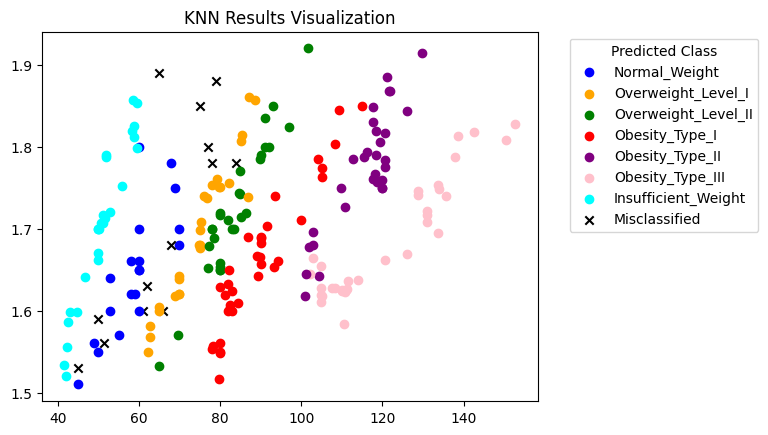

Broj znakova 'x' na grafiku: 13


In [ ]:
count_x = 0

class_colors = {
    'Normal_Weight': 'blue',
    'Overweight_Level_I': 'orange',
    'Overweight_Level_II': 'green',
    'Obesity_Type_I': 'red',
    'Obesity_Type_II': 'purple',
    'Obesity_Type_III': 'pink',
    'Insufficient_Weight': 'cyan'
}

x_feature = 'Weight'
y_feature = 'Height'

for i in range(len(X_test)):
    if Y_pred[i] == y_test.iloc[i]:
        color = class_colors[Y_pred[i]]
        plt.scatter(X_test[x_feature].iloc[i], X_test[y_feature].iloc[i], color=color)
    else:
        plt.scatter(X_test[x_feature].iloc[i], X_test[y_feature].iloc[i], color='black', marker='x')
        count_x += 1

for label, color in class_colors.items():
    plt.scatter([], [], color=color, label=label)
plt.scatter([], [], color='black', marker='x', label='Misclassified')

plt.legend(title='Predicted Class', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('KNN Results Visualization')
plt.show()

print("Broj znakova 'x' na grafiku:", count_x)

- Formiranje matrice konfuzije

In [ ]:
class_names = ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Insufficient_Weight']
conf_mat = pd.DataFrame(0, columns=class_names, index=class_names)
class_indices = {class_name: i for i, class_name in enumerate(class_names)}

for pred, true in zip(Y_pred, y_test):
    pred_class = class_names[pred] if isinstance(pred, int) else pred
    true_class = class_names[true] if isinstance(true, int) else true
    pred_index = class_indices[pred_class]
    true_index = class_indices[true_class]
    conf_mat.iloc[true_index, pred_index] += 1

print(conf_mat)

                     Normal_Weight  Overweight_Level_I  Overweight_Level_II  \
Normal_Weight                   19                   3                    4   
Overweight_Level_I               1                  27                    1   
Overweight_Level_II              0                   0                   29   
Obesity_Type_I                   0                   0                    0   
Obesity_Type_II                  0                   0                    0   
Obesity_Type_III                 0                   0                    0   
Insufficient_Weight              1                   0                    0   

                     Obesity_Type_I  Obesity_Type_II  Obesity_Type_III  \
Normal_Weight                     0                0                 0   
Overweight_Level_I                0                0                 0   
Overweight_Level_II               0                0                 0   
Obesity_Type_I                   35                0                 0 

- Grafički prikaz matrice konfuzije

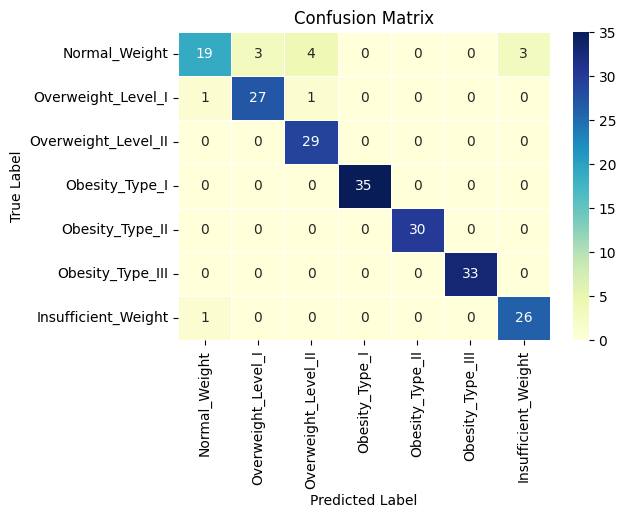

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt='g', linewidths=0.5)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

- Mere uspešnosti klasifikatora

In [ ]:
def calculate_metrics(TP, TN, FP, FN):
    precision = TP / (TP + FP)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    F_score = 2 * precision * sensitivity / (precision + sensitivity)
    return precision, accuracy, sensitivity, specificity, F_score

metrics = {}
for i, class_name in enumerate(class_names):
    TP = conf_mat.iloc[i, i]
    FN = conf_mat.iloc[i, :].sum() - TP
    FP = conf_mat.iloc[:, i].sum() - TP
    TN = conf_mat.values.sum() - (TP + FN + FP)
    metrics[class_name] = calculate_metrics(TP, TN, FP, FN)

for class_name, (precision, accuracy, sensitivity, specificity, F_score) in metrics.items():
    print(f"Metrics for {class_name}:")
    print("Precision:", f"{precision*100:.2f}%")
    print("Accuracy:", f"{accuracy*100:.2f}%")
    print("Sensitivity/Recall:", f"{sensitivity*100:.2f}%")
    print("Specificity:", f"{specificity*100:.2f}%")
    print("F-score:", f"{F_score*100:.2f}%")
    print()

Metrics for Normal_Weight:
Precision: 90.48%
Accuracy: 94.34%
Sensitivity/Recall: 65.52%
Specificity: 98.91%
F-score: 76.00%

Metrics for Overweight_Level_I:
Precision: 90.00%
Accuracy: 97.64%
Sensitivity/Recall: 93.10%
Specificity: 98.36%
F-score: 91.53%

Metrics for Overweight_Level_II:
Precision: 85.29%
Accuracy: 97.64%
Sensitivity/Recall: 100.00%
Specificity: 97.27%
F-score: 92.06%

Metrics for Obesity_Type_I:
Precision: 100.00%
Accuracy: 100.00%
Sensitivity/Recall: 100.00%
Specificity: 100.00%
F-score: 100.00%

Metrics for Obesity_Type_II:
Precision: 100.00%
Accuracy: 100.00%
Sensitivity/Recall: 100.00%
Specificity: 100.00%
F-score: 100.00%

Metrics for Obesity_Type_III:
Precision: 100.00%
Accuracy: 100.00%
Sensitivity/Recall: 100.00%
Specificity: 100.00%
F-score: 100.00%

Metrics for Insufficient_Weight:
Precision: 89.66%
Accuracy: 98.11%
Sensitivity/Recall: 96.30%
Specificity: 98.38%
F-score: 92.86%



-  Jedinstevene mikro i makro mere, prosečna tačnost za celokupan klasifikator




In [ ]:
accuracy = accuracy_score(y_test, Y_pred)
precision_micro = precision_score(y_test, Y_pred, average='micro')
precision_macro = precision_score(y_test, Y_pred, average='macro')
recall_micro = recall_score(y_test, Y_pred, average='micro')
recall_macro = recall_score(y_test, Y_pred, average='macro')
f1_micro = f1_score(y_test, Y_pred, average='micro')
f1_macro = f1_score(y_test, Y_pred, average='macro')

print("Accuracy:", accuracy)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Micro Recall:", recall_micro)
print("Macro Recall:", recall_macro)
print("Micro F1 Score:", f1_micro)
print("Macro F1 Score:", f1_macro)

Accuracy: 0.9386792452830188
Micro Precision: 0.9386792452830188
Macro Precision: 0.9363221150529177
Micro Recall: 0.9386792452830188
Macro Recall: 0.935595694216384
Micro F1 Score: 0.9386792452830188
Macro F1 Score: 0.9320657980706407


- Izračunavanje mera uspešnosti primenom makro mera

In [ ]:
accuracy = round(accuracy_score(y_test, Y_pred) * 100, 1)
precision_macro = round(precision_score(y_test, Y_pred, average='macro') * 100, 1)
recall_macro = round(recall_score(y_test, Y_pred, average='macro') * 100, 1)
f1_macro = round(f1_score(y_test, Y_pred, average='macro') * 100, 1)

data = {
    "Measure": ["Accuracy", "Precision", "Sensitivity", "F1-score"],
    "Value": [accuracy, precision_macro, recall_macro, f1_macro]
}
df = pd.DataFrame(data)
print(df)

       Measure  Value
0     Accuracy   93.9
1    Precision   93.6
2  Sensitivity   93.6
3     F1-score   93.2


# KNN algoritam sa smanjenom dimenzionalnošću primenom LDA algoritma

- Standardizacija

In [ ]:
s = StandardScaler()
s.fit(X_train)
x_train_std = s.transform(X_train)
x_test_std = s.transform(X_test)

In [ ]:
x_train_std = pd.DataFrame(x_train_std)
x_test_std = pd.DataFrame(x_test_std)

- Ilustracija primene PCA i LDA algoritma

In [ ]:
pca = PCA(n_components=3)
pca.fit(x_train_std)
X_train_pca = pca.transform(x_train_std)
X_test_pca = pca.transform(x_test_std)

lda = LinearDiscriminantAnalysis(n_components=3)
lda.fit(x_train_std, y_train)
X_train_lda = lda.transform(x_train_std)
X_test_lda = lda.transform(x_test_std)

Text(0.5, 1.0, 'PCA of ObesityDataSet')

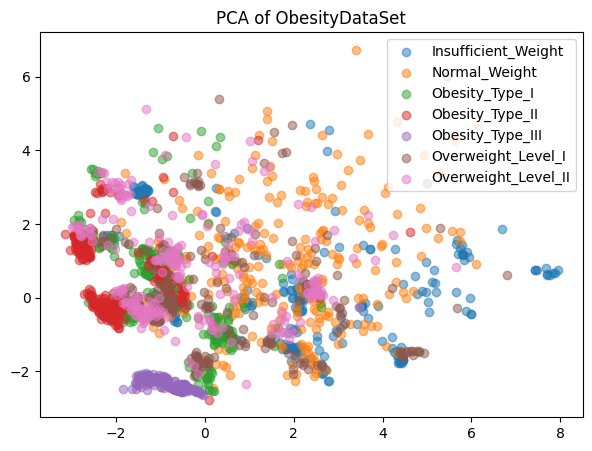

In [ ]:
target_names = np.unique(y)
plt.figure(figsize=(7,5))

for i in target_names:
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], alpha=.5, label=i)
plt.legend()
plt.title('PCA of ObesityDataSet')

Text(0.5, 1.0, 'LDA of ObesityDataSet')

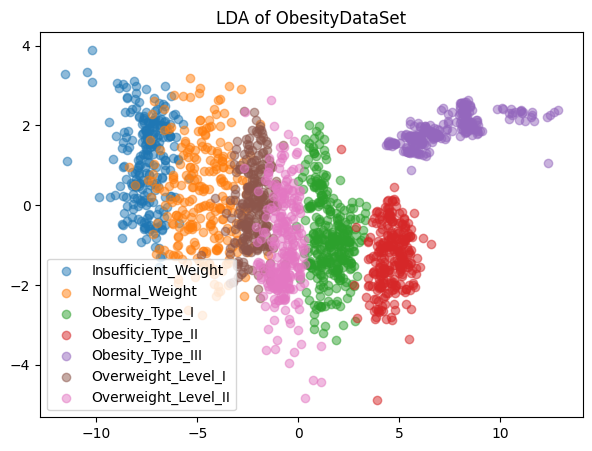

In [ ]:
plt.figure(figsize=(7,5))

for i in target_names:
    plt.scatter(X_train_lda[y_train == i, 0], X_train_lda[y_train == i, 1], alpha=.5, label=i)
plt.legend()
plt.title('LDA of ObesityDataSet')

- Grid pretraga za određivanje hiperparametara

In [ ]:
parameters = {'n_neighbors': [1, 5, 10, 20], 'metric': ['hamming', 'euclidean', 'manhattan']}
classifier = KNeighborsClassifier()
clf = GridSearchCV(classifier, parameters, scoring='accuracy', cv=5, verbose=3)
clf.fit(X_train_lda, y_train)
print("Best score: ", clf.best_score_)
print("Best parameters: ", clf.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .....metric=hamming, n_neighbors=1;, score=0.145 total time=   0.1s
[CV 2/5] END .....metric=hamming, n_neighbors=1;, score=0.137 total time=   0.1s
[CV 3/5] END .....metric=hamming, n_neighbors=1;, score=0.139 total time=   0.1s
[CV 4/5] END .....metric=hamming, n_neighbors=1;, score=0.137 total time=   0.2s
[CV 5/5] END .....metric=hamming, n_neighbors=1;, score=0.137 total time=   0.2s
[CV 1/5] END .....metric=hamming, n_neighbors=5;, score=0.153 total time=   0.1s
[CV 2/5] END .....metric=hamming, n_neighbors=5;, score=0.134 total time=   0.1s
[CV 3/5] END .....metric=hamming, n_neighbors=5;, score=0.137 total time=   0.1s
[CV 4/5] END .....metric=hamming, n_neighbors=5;, score=0.134 total time=   0.0s
[CV 5/5] END .....metric=hamming, n_neighbors=5;, score=0.135 total time=   0.1s
[CV 1/5] END ....metric=hamming, n_neighbors=10;, score=0.139 total time=   0.1s
[CV 2/5] END ....metric=hamming, n_neighbors=10;

- Inicijalizacija i obuka klasifikatora

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
classifier.fit(X_train_lda, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

- Validacija dobijenih rezultata

In [ ]:
Y_pred = classifier.predict(X_test_lda)
for i, j in zip(y_test, Y_pred):
    print(i, j)

Obesity_Type_I Obesity_Type_I
Overweight_Level_I Overweight_Level_I
Insufficient_Weight Insufficient_Weight
Overweight_Level_II Overweight_Level_II
Insufficient_Weight Insufficient_Weight
Overweight_Level_I Overweight_Level_I
Normal_Weight Overweight_Level_I
Overweight_Level_II Overweight_Level_II
Normal_Weight Normal_Weight
Overweight_Level_II Overweight_Level_II
Obesity_Type_II Obesity_Type_II
Normal_Weight Normal_Weight
Obesity_Type_III Obesity_Type_III
Obesity_Type_II Obesity_Type_II
Obesity_Type_III Obesity_Type_III
Obesity_Type_II Obesity_Type_II
Obesity_Type_I Obesity_Type_I
Obesity_Type_I Obesity_Type_I
Obesity_Type_III Obesity_Type_III
Obesity_Type_III Obesity_Type_III
Insufficient_Weight Insufficient_Weight
Obesity_Type_II Obesity_Type_II
Obesity_Type_I Obesity_Type_I
Obesity_Type_II Obesity_Type_II
Normal_Weight Normal_Weight
Overweight_Level_I Overweight_Level_I
Overweight_Level_I Overweight_Level_I
Normal_Weight Normal_Weight
Overweight_Level_I Overweight_Level_I
Obesity_T

- Vizualizacija rezultata

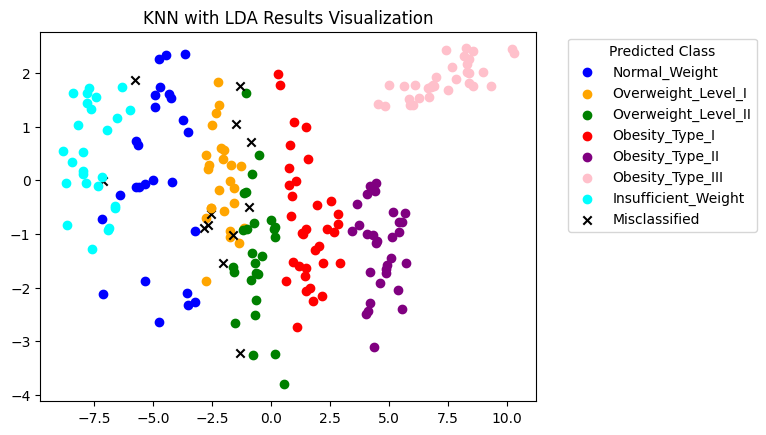

Broj znakova 'x' na grafiku: 12


In [ ]:
count_x = 0

for i in range(len(X_test_lda)):
    if Y_pred[i] == y_test.iloc[i]:
        color = class_colors[Y_pred[i]]
        plt.scatter(X_test_lda[i, 0], X_test_lda[i, 1], color=color)

    else:
        plt.scatter(X_test_lda[i, 0], X_test_lda[i, 1], color='black', marker='x')
        count_x += 1

for label, color in class_colors.items():
    plt.scatter([], [], color=color, label=label)
plt.scatter([], [], color='black', marker='x', label='Misclassified')

plt.legend(title='Predicted Class', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('KNN with LDA Results Visualization')
plt.show()

print("Broj znakova 'x' na grafiku:", count_x)

- Matrica konfuzije

In [ ]:
conf_mat = pd.DataFrame(0, columns=class_names, index=class_names)
class_indices = {class_name: i for i, class_name in enumerate(class_names)}

for pred, true in zip(Y_pred, y_test):
    pred_class = class_names[pred] if isinstance(pred, int) else pred
    true_class = class_names[true] if isinstance(true, int) else true
    pred_index = class_indices[pred_class]
    true_index = class_indices[true_class]
    conf_mat.iloc[true_index, pred_index] += 1

print(conf_mat)

                     Normal_Weight  Overweight_Level_I  Overweight_Level_II  \
Normal_Weight                   26                   2                    0   
Overweight_Level_I               0                  25                    4   
Overweight_Level_II              0                   3                   26   
Obesity_Type_I                   0                   0                    1   
Obesity_Type_II                  0                   0                    0   
Obesity_Type_III                 0                   0                    0   
Insufficient_Weight              1                   0                    0   

                     Obesity_Type_I  Obesity_Type_II  Obesity_Type_III  \
Normal_Weight                     0                0                 0   
Overweight_Level_I                0                0                 0   
Overweight_Level_II               0                0                 0   
Obesity_Type_I                   34                0                 0 

- Grafički prikaz matrice konfuzije

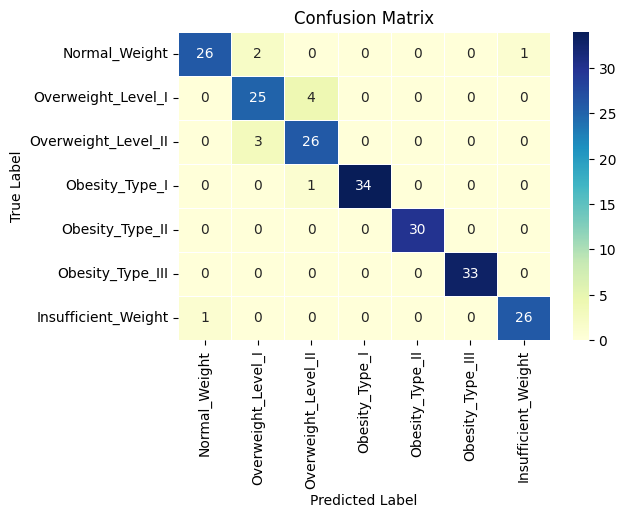

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt='g', linewidths=0.5)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

- Mere uspešnosti klasifikatora

In [ ]:
def calculate_metrics(TP, TN, FP, FN):
    precision = TP / (TP + FP)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    F_score = 2 * precision * sensitivity / (precision + sensitivity)
    return precision, accuracy, sensitivity, specificity, F_score

metrics = {}
for i, class_name in enumerate(class_names):
    TP = conf_mat.iloc[i, i]
    FN = conf_mat.iloc[i, :].sum() - TP
    FP = conf_mat.iloc[:, i].sum() - TP
    TN = conf_mat.values.sum() - (TP + FN + FP)
    metrics[class_name] = calculate_metrics(TP, TN, FP, FN)

for class_name, (precision, accuracy, sensitivity, specificity, F_score) in metrics.items():
    print(f"Metrics for {class_name}:")
    print("Precision:", f"{precision*100:.2f}%")
    print("Accuracy:", f"{accuracy*100:.2f}%")
    print("Sensitivity/Recall:", f"{sensitivity*100:.2f}%")
    print("Specificity:", f"{specificity*100:.2f}%")
    print("F-score:", f"{F_score*100:.2f}%")
    print()

Metrics for Normal_Weight:
Precision: 96.30%
Accuracy: 98.11%
Sensitivity/Recall: 89.66%
Specificity: 99.45%
F-score: 92.86%

Metrics for Overweight_Level_I:
Precision: 83.33%
Accuracy: 95.75%
Sensitivity/Recall: 86.21%
Specificity: 97.27%
F-score: 84.75%

Metrics for Overweight_Level_II:
Precision: 83.87%
Accuracy: 96.23%
Sensitivity/Recall: 89.66%
Specificity: 97.27%
F-score: 86.67%

Metrics for Obesity_Type_I:
Precision: 100.00%
Accuracy: 99.53%
Sensitivity/Recall: 97.14%
Specificity: 100.00%
F-score: 98.55%

Metrics for Obesity_Type_II:
Precision: 100.00%
Accuracy: 100.00%
Sensitivity/Recall: 100.00%
Specificity: 100.00%
F-score: 100.00%

Metrics for Obesity_Type_III:
Precision: 100.00%
Accuracy: 100.00%
Sensitivity/Recall: 100.00%
Specificity: 100.00%
F-score: 100.00%

Metrics for Insufficient_Weight:
Precision: 96.30%
Accuracy: 99.06%
Sensitivity/Recall: 96.30%
Specificity: 99.46%
F-score: 96.30%



- Jedinstevene mikro i makro mere, prosečna tačnost za celokupan klasifikator



In [ ]:
accuracy = accuracy_score(y_test, Y_pred)
precision_micro = precision_score(y_test, Y_pred, average='micro')
precision_macro = precision_score(y_test, Y_pred, average='macro')
recall_micro = recall_score(y_test, Y_pred, average='micro')
recall_macro = recall_score(y_test, Y_pred, average='macro')
f1_micro = f1_score(y_test, Y_pred, average='micro')
f1_macro = f1_score(y_test, Y_pred, average='macro')

print("Accuracy:", accuracy)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Micro Recall:", recall_micro)
print("Macro Recall:", recall_macro)
print("Micro F1 Score:", f1_micro)
print("Macro F1 Score:", f1_macro)

Accuracy: 0.9433962264150944
Micro Precision: 0.9433962264150944
Macro Precision: 0.9425669909540877
Micro Recall: 0.9433962264150944
Macro Recall: 0.9413662783120912
Micro F1 Score: 0.9433962264150944
Macro F1 Score: 0.9415951330995018


- Izračunavanje mera uspešnosti primenom makro mera

In [ ]:
accuracy = round(accuracy_score(y_test, Y_pred) * 100, 1)
precision_macro = round(precision_score(y_test, Y_pred, average='macro') * 100, 1)
recall_macro = round(recall_score(y_test, Y_pred, average='macro') * 100, 1)
f1_macro = round(f1_score(y_test, Y_pred, average='macro') * 100, 1)

data = {
    "Measure": ["Accuracy", "Precision", "Sensitivity", "F1-score"],
    "Value": [accuracy, precision_macro, recall_macro, f1_macro]
}
df = pd.DataFrame(data)
print(df)

       Measure  Value
0     Accuracy   94.3
1    Precision   94.3
2  Sensitivity   94.1
3     F1-score   94.2


# KNN algoritam sa smanjenom dimenzionalnošću primenom PCA algoritma


- Grid pretraga za određivanje hiperparametara

In [ ]:
parameters = {'n_neighbors': [1, 5, 10, 20], 'metric': ['hamming', 'euclidean', 'manhattan']}
classifier = KNeighborsClassifier()
clf = GridSearchCV(classifier, parameters, scoring='accuracy', cv=5, verbose=3)
clf.fit(X_train_pca, y_train)
print("Best score: ", clf.best_score_)
print("Best parameters: ", clf.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END .....metric=hamming, n_neighbors=1;, score=0.147 total time=   0.1s
[CV 2/5] END .....metric=hamming, n_neighbors=1;, score=0.153 total time=   0.1s
[CV 3/5] END .....metric=hamming, n_neighbors=1;, score=0.150 total time=   0.1s
[CV 4/5] END .....metric=hamming, n_neighbors=1;, score=0.153 total time=   0.1s
[CV 5/5] END .....metric=hamming, n_neighbors=1;, score=0.174 total time=   0.1s
[CV 1/5] END .....metric=hamming, n_neighbors=5;, score=0.166 total time=   0.1s
[CV 2/5] END .....metric=hamming, n_neighbors=5;, score=0.147 total time=   0.1s
[CV 3/5] END .....metric=hamming, n_neighbors=5;, score=0.174 total time=   0.1s
[CV 4/5] END .....metric=hamming, n_neighbors=5;, score=0.145 total time=   0.1s
[CV 5/5] END .....metric=hamming, n_neighbors=5;, score=0.145 total time=   0.1s
[CV 1/5] END ....metric=hamming, n_neighbors=10;, score=0.163 total time=   0.1s
[CV 2/5] END ....metric=hamming, n_neighbors=10;

- Inicijalizacija i obuka klasifikatora

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
classifier.fit(X_train_pca, y_train)

KNeighborsClassifier(metric='euclidean')

- Validacija dobijenih rezultata

In [ ]:
Y_pred = classifier.predict(X_test_pca)
for i, j in zip(y_test, Y_pred):
    print(i, j)

Obesity_Type_I Obesity_Type_I
Overweight_Level_I Normal_Weight
Insufficient_Weight Insufficient_Weight
Overweight_Level_II Overweight_Level_II
Insufficient_Weight Insufficient_Weight
Overweight_Level_I Overweight_Level_II
Normal_Weight Normal_Weight
Overweight_Level_II Obesity_Type_I
Normal_Weight Normal_Weight
Overweight_Level_II Overweight_Level_II
Obesity_Type_II Obesity_Type_II
Normal_Weight Normal_Weight
Obesity_Type_III Obesity_Type_III
Obesity_Type_II Obesity_Type_II
Obesity_Type_III Obesity_Type_III
Obesity_Type_II Obesity_Type_II
Obesity_Type_I Obesity_Type_I
Obesity_Type_I Obesity_Type_I
Obesity_Type_III Obesity_Type_III
Obesity_Type_III Obesity_Type_III
Insufficient_Weight Insufficient_Weight
Obesity_Type_II Obesity_Type_II
Obesity_Type_I Insufficient_Weight
Obesity_Type_II Obesity_Type_II
Normal_Weight Normal_Weight
Overweight_Level_I Overweight_Level_I
Overweight_Level_I Overweight_Level_I
Normal_Weight Overweight_Level_I
Overweight_Level_I Normal_Weight
Obesity_Type_I Obe

- Vizualizacija rezultata

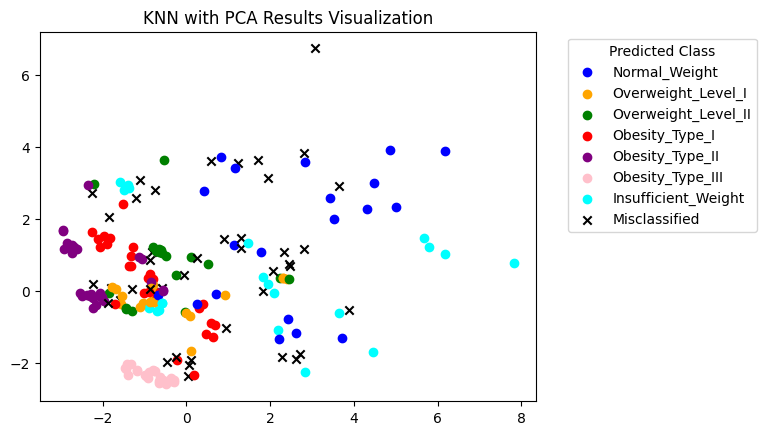

Broj znakova 'x' na grafiku: 42


In [ ]:
count_x = 0

for i in range(len(X_test_pca)):
    if Y_pred[i] == y_test.iloc[i]:
        color = class_colors[Y_pred[i]]
        plt.scatter(X_test_pca[i, 0], X_test_pca[i, 1], color=color)

    else:
        plt.scatter(X_test_pca[i, 0], X_test_pca[i, 1], color='black', marker='x')
        count_x += 1

for label, color in class_colors.items():
    plt.scatter([], [], color=color, label=label)
plt.scatter([], [], color='black', marker='x', label='Misclassified')

plt.legend(title='Predicted Class', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('KNN with PCA Results Visualization')
plt.show()

print("Broj znakova 'x' na grafiku:", count_x)

- Matrica konfuzije

In [ ]:
conf_mat = pd.DataFrame(0, columns=class_names, index=class_names)
class_indices = {class_name: i for i, class_name in enumerate(class_names)}

for pred, true in zip(Y_pred, y_test):
    pred_class = class_names[pred] if isinstance(pred, int) else pred
    true_class = class_names[true] if isinstance(true, int) else true
    pred_index = class_indices[pred_class]
    true_index = class_indices[true_class]
    conf_mat.iloc[true_index, pred_index] += 1

print(conf_mat)

                     Normal_Weight  Overweight_Level_I  Overweight_Level_II  \
Normal_Weight                   20                   4                    2   
Overweight_Level_I               4                  18                    2   
Overweight_Level_II              2                   3                   20   
Obesity_Type_I                   3                   0                    0   
Obesity_Type_II                  0                   0                    1   
Obesity_Type_III                 0                   0                    0   
Insufficient_Weight              4                   0                    0   

                     Obesity_Type_I  Obesity_Type_II  Obesity_Type_III  \
Normal_Weight                     0                0                 0   
Overweight_Level_I                3                0                 0   
Overweight_Level_II               2                1                 0   
Obesity_Type_I                   27                2                 2 

- Grafički prikaz matrice konfuzije

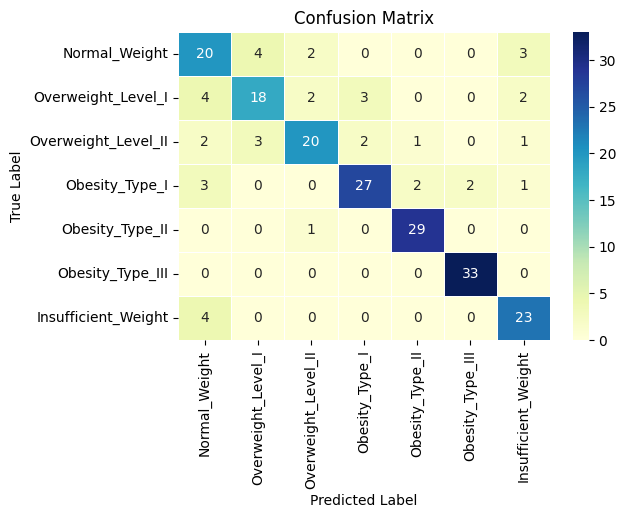

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt='g', linewidths=0.5)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

- Mere uspešnosti klasifikatora

In [ ]:
def calculate_metrics(TP, TN, FP, FN):
    precision = TP / (TP + FP)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    F_score = 2 * precision * sensitivity / (precision + sensitivity)
    return precision, accuracy, sensitivity, specificity, F_score

metrics = {}
for i, class_name in enumerate(class_names):
    TP = conf_mat.iloc[i, i]
    FN = conf_mat.iloc[i, :].sum() - TP
    FP = conf_mat.iloc[:, i].sum() - TP
    TN = conf_mat.values.sum() - (TP + FN + FP)
    metrics[class_name] = calculate_metrics(TP, TN, FP, FN)

for class_name, (precision, accuracy, sensitivity, specificity, F_score) in metrics.items():
    print(f"Metrics for {class_name}:")
    print("Precision:", f"{precision*100:.2f}%")
    print("Accuracy:", f"{accuracy*100:.2f}%")
    print("Sensitivity/Recall:", f"{sensitivity*100:.2f}%")
    print("Specificity:", f"{specificity*100:.2f}%")
    print("F-score:", f"{F_score*100:.2f}%")
    print()

Metrics for Normal_Weight:
Precision: 60.61%
Accuracy: 89.62%
Sensitivity/Recall: 68.97%
Specificity: 92.90%
F-score: 64.52%

Metrics for Overweight_Level_I:
Precision: 72.00%
Accuracy: 91.51%
Sensitivity/Recall: 62.07%
Specificity: 96.17%
F-score: 66.67%

Metrics for Overweight_Level_II:
Precision: 80.00%
Accuracy: 93.40%
Sensitivity/Recall: 68.97%
Specificity: 97.27%
F-score: 74.07%

Metrics for Obesity_Type_I:
Precision: 84.38%
Accuracy: 93.87%
Sensitivity/Recall: 77.14%
Specificity: 97.18%
F-score: 80.60%

Metrics for Obesity_Type_II:
Precision: 90.62%
Accuracy: 98.11%
Sensitivity/Recall: 96.67%
Specificity: 98.35%
F-score: 93.55%

Metrics for Obesity_Type_III:
Precision: 94.29%
Accuracy: 99.06%
Sensitivity/Recall: 100.00%
Specificity: 98.88%
F-score: 97.06%

Metrics for Insufficient_Weight:
Precision: 76.67%
Accuracy: 94.81%
Sensitivity/Recall: 85.19%
Specificity: 96.22%
F-score: 80.70%



# SVM algoritam

- Grid pretraga za određivanje hiperparametara

In [ ]:
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

svc = svm.SVC()

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_kernel = grid_search.best_params_['kernel']

print("Best kernel:", best_kernel)

Best kernel: linear


- Treniranje SVM modela i evaluacija na test skupu

In [ ]:
clf = SVC(C=1, kernel=best_kernel, decision_function_shape='ovr')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))

Accuracy: 0.8867924528301887

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.87      0.96      0.91        27
      Normal_Weight       0.88      0.72      0.79        29
     Obesity_Type_I       0.86      0.89      0.87        35
    Obesity_Type_II       0.97      1.00      0.98        30
   Obesity_Type_III       1.00      1.00      1.00        33
 Overweight_Level_I       0.78      0.86      0.82        29
Overweight_Level_II       0.85      0.76      0.80        29

           accuracy                           0.89       212
          macro avg       0.89      0.88      0.88       212
       weighted avg       0.89      0.89      0.89       212



- Vizualizacija dobijenih rezultata

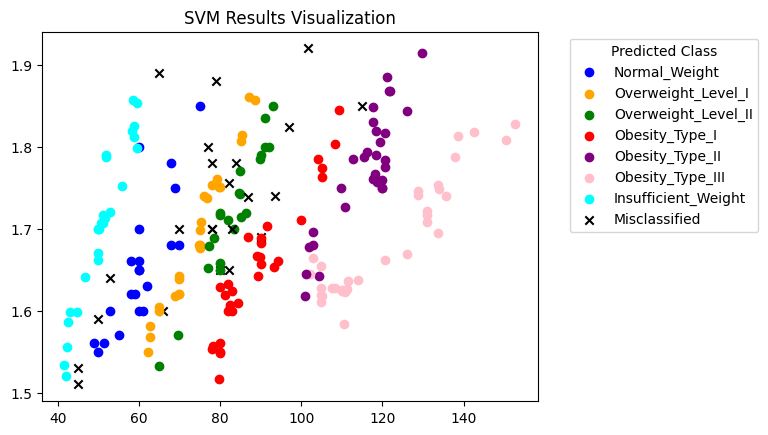

Broj znakova 'x' na grafiku: 24


In [ ]:
count_x = 0

class_colors = {
    'Normal_Weight': 'blue',
    'Overweight_Level_I': 'orange',
    'Overweight_Level_II': 'green',
    'Obesity_Type_I': 'red',
    'Obesity_Type_II': 'purple',
    'Obesity_Type_III': 'pink',
    'Insufficient_Weight': 'cyan'
}

x_feature = 'Weight'
y_feature = 'Height'

for i in range(len(X_test)):
    if y_pred[i] == y_test.iloc[i]:
        color = class_colors[y_pred[i]]
        plt.scatter(X_test[x_feature].iloc[i], X_test[y_feature].iloc[i], color=color)
    else:
        plt.scatter(X_test[x_feature].iloc[i], X_test[y_feature].iloc[i], color='black', marker='x')
        count_x += 1

for label, color in class_colors.items():
    plt.scatter([], [], color=color, label=label)
plt.scatter([], [], color='black', marker='x', label='Misclassified')

plt.legend(title='Predicted Class', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('SVM Results Visualization')
plt.show()

print("Broj znakova 'x' na grafiku:", count_x)

- Formiranje matrice konfuzije

In [ ]:
class_names = ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Insufficient_Weight']
conf_mat = pd.DataFrame(0, columns=class_names, index=class_names)
class_indices = {class_name: i for i, class_name in enumerate(class_names)}

for pred, true in zip(Y_pred, y_test):
    pred_class = class_names[pred] if isinstance(pred, int) else pred
    true_class = class_names[true] if isinstance(true, int) else true
    pred_index = class_indices[pred_class]
    true_index = class_indices[true_class]
    conf_mat.iloc[true_index, pred_index] += 1

print(conf_mat)

                     Normal_Weight  Overweight_Level_I  Overweight_Level_II  \
Normal_Weight                   20                   4                    2   
Overweight_Level_I               4                  18                    2   
Overweight_Level_II              2                   3                   20   
Obesity_Type_I                   3                   0                    0   
Obesity_Type_II                  0                   0                    1   
Obesity_Type_III                 0                   0                    0   
Insufficient_Weight              4                   0                    0   

                     Obesity_Type_I  Obesity_Type_II  Obesity_Type_III  \
Normal_Weight                     0                0                 0   
Overweight_Level_I                3                0                 0   
Overweight_Level_II               2                1                 0   
Obesity_Type_I                   27                2                 2 

- Grafički prikaz matrice konfuzije

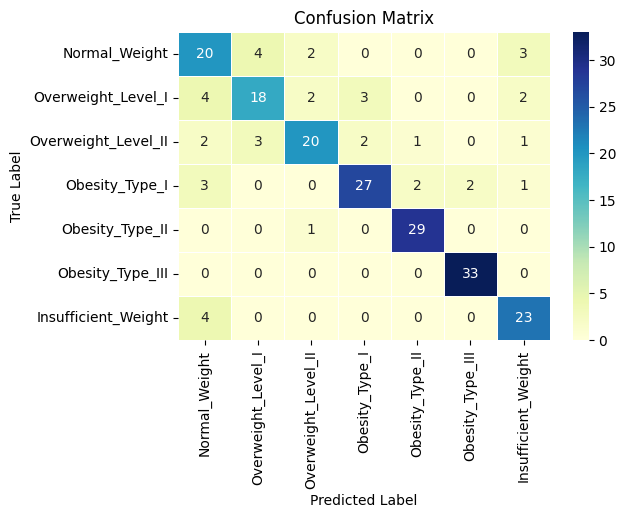

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, cmap="YlGnBu", fmt='g', linewidths=0.5)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

- Mere uspešnosti klasifikatora

In [ ]:
def calculate_metrics(TP, TN, FP, FN):
    precision = TP / (TP + FP)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    F_score = 2 * precision * sensitivity / (precision + sensitivity)
    return precision, accuracy, sensitivity, specificity, F_score

metrics = {}
for i, class_name in enumerate(class_names):
    TP = conf_mat.iloc[i, i]
    FN = conf_mat.iloc[i, :].sum() - TP
    FP = conf_mat.iloc[:, i].sum() - TP
    TN = conf_mat.values.sum() - (TP + FN + FP)
    metrics[class_name] = calculate_metrics(TP, TN, FP, FN)

for class_name, (precision, accuracy, sensitivity, specificity, F_score) in metrics.items():
    print(f"Metrics for {class_name}:")
    print("Precision:", f"{precision*100:.2f}%")
    print("Accuracy:", f"{accuracy*100:.2f}%")
    print("Sensitivity/Recall:", f"{sensitivity*100:.2f}%")
    print("Specificity:", f"{specificity*100:.2f}%")
    print("F-score:", f"{F_score*100:.2f}%")
    print()

Metrics for Normal_Weight:
Precision: 60.61%
Accuracy: 89.62%
Sensitivity/Recall: 68.97%
Specificity: 92.90%
F-score: 64.52%

Metrics for Overweight_Level_I:
Precision: 72.00%
Accuracy: 91.51%
Sensitivity/Recall: 62.07%
Specificity: 96.17%
F-score: 66.67%

Metrics for Overweight_Level_II:
Precision: 80.00%
Accuracy: 93.40%
Sensitivity/Recall: 68.97%
Specificity: 97.27%
F-score: 74.07%

Metrics for Obesity_Type_I:
Precision: 84.38%
Accuracy: 93.87%
Sensitivity/Recall: 77.14%
Specificity: 97.18%
F-score: 80.60%

Metrics for Obesity_Type_II:
Precision: 90.62%
Accuracy: 98.11%
Sensitivity/Recall: 96.67%
Specificity: 98.35%
F-score: 93.55%

Metrics for Obesity_Type_III:
Precision: 94.29%
Accuracy: 99.06%
Sensitivity/Recall: 100.00%
Specificity: 98.88%
F-score: 97.06%

Metrics for Insufficient_Weight:
Precision: 76.67%
Accuracy: 94.81%
Sensitivity/Recall: 85.19%
Specificity: 96.22%
F-score: 80.70%



-  Jedinstevene mikro i makro mere, prosečna tačnost za celokupan klasifikator




In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
recall_micro = recall_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Micro Precision:", precision_micro)
print("Macro Precision:", precision_macro)
print("Micro Recall:", recall_micro)
print("Macro Recall:", recall_macro)
print("Micro F1 Score:", f1_micro)
print("Macro F1 Score:", f1_macro)

Accuracy: 0.8867924528301887
Micro Precision: 0.8867924528301887
Macro Precision: 0.8854176513450707
Micro Recall: 0.8867924528301887
Macro Recall: 0.8847864049834493
Micro F1 Score: 0.8867924528301887
Macro F1 Score: 0.8830359510124819


- Izračunavanje mera uspešnosti primenom makro mera

In [ ]:
accuracy = round(accuracy_score(y_test, y_pred) * 100, 1)
precision_macro = round(precision_score(y_test, y_pred, average='macro') * 100, 1)
recall_macro = round(recall_score(y_test, y_pred, average='macro') * 100, 1)
f1_macro = round(f1_score(y_test, y_pred, average='macro') * 100, 1)

data = {
    "Measure": ["Accuracy", "Precision", "Sensitivity", "F1-score"],
    "Value": [accuracy, precision_macro, recall_macro, f1_macro]
}
df = pd.DataFrame(data)
print(df)

       Measure  Value
0     Accuracy   88.7
1    Precision   88.5
2  Sensitivity   88.5
3     F1-score   88.3


# SVM algoritam sa smanjenom dimenzionalnošću

- Grid pretraga za određivanje hiperparametara

In [ ]:
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

svc = svm.SVC()

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_lda, y_train)

best_kernel = grid_search.best_params_['kernel']

print("Best kernel:", best_kernel)

Best kernel: rbf


- Treniranje SVM modela i evaluacija na test skupu

In [ ]:
clf = SVC(C=1, kernel=best_kernel, decision_function_shape='ovr')

clf.fit(X_train_lda, y_train)

y_pred = clf.predict(X_test_lda)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9245283018867925

Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.96      0.96      0.96        27
      Normal_Weight       0.96      0.83      0.89        29
     Obesity_Type_I       1.00      0.97      0.99        35
    Obesity_Type_II       1.00      1.00      1.00        30
   Obesity_Type_III       1.00      1.00      1.00        33
 Overweight_Level_I       0.77      0.79      0.78        29
Overweight_Level_II       0.79      0.90      0.84        29

           accuracy                           0.92       212
          macro avg       0.93      0.92      0.92       212
       weighted avg       0.93      0.92      0.93       212



- Prikaz broja loše klasifikovanih uzoraka na tačkastom grafikonu

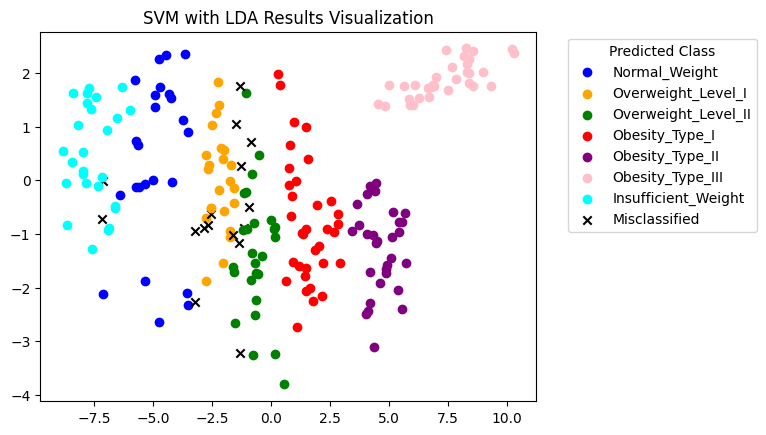

Broj znakova 'x' na grafiku: 16


In [ ]:
count_x = 0

for i in range(len(X_test_lda)):
    if y_pred[i] == y_test.iloc[i]:
        color = class_colors[y_pred[i]]
        plt.scatter(X_test_lda[i, 0], X_test_lda[i, 1], color=color)

    else:
        plt.scatter(X_test_lda[i, 0], X_test_lda[i, 1], color='black', marker='x')
        count_x += 1

for label, color in class_colors.items():
    plt.scatter([], [], color=color, label=label)
plt.scatter([], [], color='black', marker='x', label='Misclassified')

plt.legend(title='Predicted Class', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('SVM with LDA Results Visualization')
plt.show()

print("Broj znakova 'x' na grafiku:", count_x)

- Izračunavanje mera uspešnosti primenom makro mera

In [ ]:
accuracy = round(accuracy_score(y_test, y_pred) * 100, 1)
precision_macro = round(precision_score(y_test, y_pred, average='macro') * 100, 1)
recall_macro = round(recall_score(y_test, y_pred, average='macro') * 100, 1)
f1_macro = round(f1_score(y_test, y_pred, average='macro') * 100, 1)

data = {
    "Measure": ["Accuracy", "Precision", "Sensitivity", "F1-score"],
    "Value": [accuracy, precision_macro, recall_macro, f1_macro]
}
df = pd.DataFrame(data)
print(df)

       Measure  Value
0     Accuracy   92.5
1    Precision   92.5
2  Sensitivity   92.2
3     F1-score   92.2


# Random forest algoritam

In [ ]:
# koriscenje kategorickih obelezja, bez dummy-a
X_random = X_original.drop(['NObeyesdad'], axis=1)

- Podela podataka, bez one-hot encoding-a

In [ ]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_random, y, test_size=0.1, random_state=10, stratify=y)

print("Dimenzije trening skupa X:", X_train_rf.shape)
print("Dimenzije test skupa X:", X_test_rf.shape)

Dimenzije trening skupa X: (1899, 15)
Dimenzije test skupa X: (212, 15)


- Kodiranje kategoričkih obeležja

In [ ]:
X_train_encoded = X_train_rf.copy()
X_test_encoded = X_test_rf.copy()

label_encoder = LabelEncoder()

for column in X_train_encoded.columns:
    if X_train_encoded[column].dtype == 'object':
        X_train_encoded[column] = label_encoder.fit_transform(X_train_encoded[column])
        X_test_encoded[column] = label_encoder.transform(X_test_encoded[column])

- Grid pretraga za određivanje hiperparametara

In [ ]:
parametri_n_estimators = {'n_estimators': range(10, 100)}

rf_n_estimators = RandomForestClassifier(max_samples=100, oob_score=True, random_state=42)

grid_search_n_estimators = GridSearchCV(rf_n_estimators, parametri_n_estimators, cv=5, scoring='accuracy')

grid_search_n_estimators.fit(X_train_encoded, y_train_rf)

print("Najbolji broj estimatora:", grid_search_n_estimators.best_params_['n_estimators'])


Najbolji broj estimatora: 99


In [ ]:
optimalni_broj_estimatora = grid_search_n_estimators.best_params_['n_estimators']

parametri_max_depth = {'max_depth': range(1, 21)}

rf_max_depth = RandomForestClassifier(n_estimators=optimalni_broj_estimatora, max_samples=100, oob_score=True, random_state = 42)

grid_search_max_depth = GridSearchCV(rf_max_depth, parametri_max_depth, cv=5, scoring='accuracy')

grid_search_max_depth.fit(X_train_encoded, y_train_rf)

print("Najbolja dubina: ", grid_search_max_depth.best_params_['max_depth'])


Najbolja dubina:  14


- Treniranje Random Forest modela i evaluacija na test skupu

In [ ]:
optimalna_dubina = grid_search_max_depth.best_params_['max_depth']
classifier = RandomForestClassifier(n_estimators=optimalni_broj_estimatora, max_depth=optimalna_dubina, max_samples=100, oob_score=True, random_state = 42)

classifier.fit(X_train_encoded, y_train_rf)

y_pred_rf = classifier.predict(X_test_encoded)

print("\nAccuracy:", accuracy_score(y_test_rf, y_pred_rf))


Accuracy: 0.8820754716981132


- Vizualizacija dobijenih rezultata

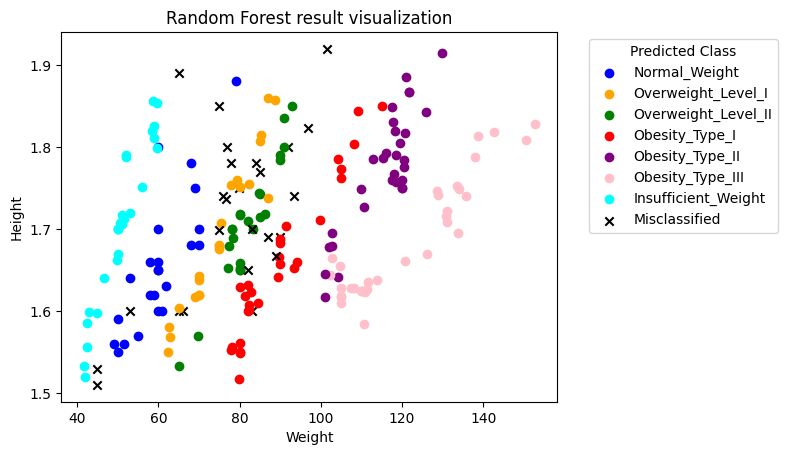

Broj znakova 'x' na grafiku: 25


In [ ]:
count_x = 0

class_colors = {
    'Normal_Weight': 'blue',
    'Overweight_Level_I': 'orange',
    'Overweight_Level_II': 'green',
    'Obesity_Type_I': 'red',
    'Obesity_Type_II': 'purple',
    'Obesity_Type_III': 'pink',
    'Insufficient_Weight': 'cyan'
}
x_feature = 'Weight'
y_feature = 'Height'

for i in range(len(X_test_encoded)):
    if y_pred_rf[i] == y_test_rf.iloc[i]:
        color = class_colors[y_pred_rf[i]]
        plt.scatter(X_test_encoded.loc[X_test_encoded.index[i], x_feature], X_test_encoded.loc[X_test_encoded.index[i], y_feature], color=color)
    else:
        plt.scatter(X_test_encoded.loc[X_test_encoded.index[i], x_feature], X_test_encoded.loc[X_test_encoded.index[i], y_feature], color='black', marker='x')
        count_x += 1

for label, color in class_colors.items():
    plt.scatter([], [], color=color, label=label)
plt.scatter([], [], color='black', marker='x', label='Misclassified')

plt.legend(title='Predicted Class', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title('Random Forest result visualization')
plt.show()

print("Broj znakova 'x' na grafiku:", count_x)

- Izračunavanje mera uspešnosti primenom makro mera

In [ ]:
accuracy = round(accuracy_score(y_test_rf, y_pred_rf) * 100, 1)
precision_macro = round(precision_score(y_test_rf, y_pred_rf, average='macro') * 100, 1)
recall_macro = round(recall_score(y_test_rf, y_pred_rf, average='macro') * 100, 1)
f1_macro = round(f1_score(y_test_rf, y_pred_rf, average='macro') * 100, 1)

# Kreiranje DataFrame-a
data = {
    "Measure": ["Accuracy", "Precision", "Sensitivity", "F1-score"],
    "Value": [accuracy, precision_macro, recall_macro, f1_macro]
}
X_original = pd.DataFrame(data)

# Ispis DataFrame-a
print(X_original)

       Measure  Value
0     Accuracy   88.2
1    Precision   88.6
2  Sensitivity   88.2
3     F1-score   88.1


# Random Forest algoritam sa smanjenom dimenzionalnošću

- Standardizacija podataka

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

- Primena LDA algoritma nad podacima za Random Forest algoritam

In [ ]:
lda_rf = LinearDiscriminantAnalysis(n_components=3)
lda_rf.fit(X_train_scaled, y_train_rf)
X_train_lda_rf= lda_rf.fit_transform(X_train_scaled, y_train_rf)
X_test_lda_rf = lda_rf.transform(X_test_scaled)

- Grid pretraga za određivanje hiperparametara

In [ ]:
parametri_n_estimators = {'n_estimators': range(10, 100)}

rf_n_estimators = RandomForestClassifier(max_samples=100, oob_score=True, random_state=42)

grid_search_n_estimators = GridSearchCV(rf_n_estimators, parametri_n_estimators, cv=5, scoring='accuracy')

grid_search_n_estimators.fit(X_train_lda_rf, y_train_rf)

print("Najbolji broj estimatora:", grid_search_n_estimators.best_params_['n_estimators'])

Najbolji broj estimatora: 78


In [ ]:
optimalni_broj_estimatora = grid_search_n_estimators.best_params_['n_estimators']

parametri_max_depth = {'max_depth': range(1, 21)}

rf_max_depth = RandomForestClassifier(n_estimators=optimalni_broj_estimatora, max_samples=100, oob_score=True, random_state = 42)

grid_search_max_depth = GridSearchCV(rf_max_depth, parametri_max_depth, cv=5, scoring='accuracy')

grid_search_max_depth.fit(X_train_lda_rf, y_train_rf)

print("Najbolja dubina:", grid_search_max_depth.best_params_['max_depth'])


Najbolja dubina: 12


In [ ]:
optimalna_dubina = grid_search_max_depth.best_params_['max_depth']
classifier = RandomForestClassifier(n_estimators=optimalni_broj_estimatora, max_depth=optimalna_dubina, max_samples=100, oob_score=True, random_state = 42)

classifier.fit(X_train_lda_rf, y_train_rf)

y_pred_rf = classifier.predict(X_test_lda_rf)

print("\nAccuracy:", accuracy_score(y_test_rf, y_pred_rf))


Accuracy: 0.910377358490566


- Vizualizacija dobijenih rezultata

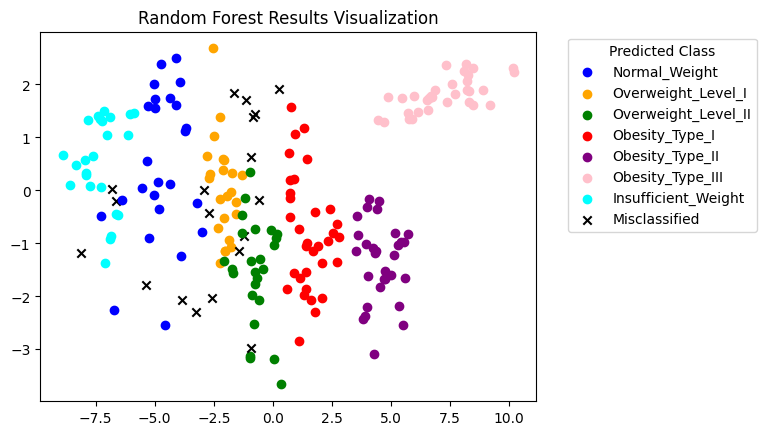

Broj znakova 'x' na grafiku: 19


In [ ]:
count_x = 0

class_colors = {
    'Normal_Weight': 'blue',
    'Overweight_Level_I': 'orange',
    'Overweight_Level_II': 'green',
    'Obesity_Type_I': 'red',
    'Obesity_Type_II': 'purple',
    'Obesity_Type_III': 'pink',
    'Insufficient_Weight': 'cyan'
}

for i in range(len(X_test_lda_rf)):
    if y_pred_rf[i] == y_test_rf.iloc[i]:
        color = class_colors[y_pred_rf[i]]
        plt.scatter(X_test_lda_rf[i, 0], X_test_lda_rf[i, 1], color=color)
    else:
        plt.scatter(X_test_lda_rf[i, 0], X_test_lda_rf[i, 1], color='black', marker='x')
        count_x += 1

for label, color in class_colors.items():
    plt.scatter([], [], color=color, label=label)
plt.scatter([], [], color='black', marker='x', label='Misclassified')

plt.legend(title='Predicted Class', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Random Forest Results Visualization')
plt.show()

print("Broj znakova 'x' na grafiku:", count_x)


- Formiranje matrice konfuzije

In [ ]:
conf_mat = pd.DataFrame(0, columns=class_names, index=class_names)
class_indices = {class_name: i for i, class_name in enumerate(class_names)}

# Popunjavanje matrice konfuzije
for pred, true in zip(y_pred_rf, y_test_rf):
    pred_class = class_names[pred] if isinstance(pred, int) else pred
    true_class = class_names[true] if isinstance(true, int) else true
    pred_index = class_indices[pred_class]
    true_index = class_indices[true_class]
    conf_mat.iloc[true_index, pred_index] += 1


print(conf_mat)

                     Normal_Weight  Overweight_Level_I  Overweight_Level_II  \
Normal_Weight                   25                   1                    3   
Overweight_Level_I               2                  23                    4   
Overweight_Level_II              1                   3                   25   
Obesity_Type_I                   0                   0                    1   
Obesity_Type_II                  0                   0                    0   
Obesity_Type_III                 0                   0                    0   
Insufficient_Weight              3                   0                    0   

                     Obesity_Type_I  Obesity_Type_II  Obesity_Type_III  \
Normal_Weight                     0                0                 0   
Overweight_Level_I                0                0                 0   
Overweight_Level_II               0                0                 0   
Obesity_Type_I                   33                0                 0 

- Izračunavanje mera uspešnosti klasifikatora

In [ ]:
def calculate_metrics(TP, TN, FP, FN):
    precision = TP / (TP + FP)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    F_score = 2 * precision * sensitivity / (precision + sensitivity)
    return precision, accuracy, sensitivity, specificity, F_score

metrics = {}
for i, class_name in enumerate(class_names):
    TP = conf_mat.iloc[i, i]
    FN = conf_mat.iloc[i, :].sum() - TP
    FP = conf_mat.iloc[:, i].sum() - TP
    TN = conf_mat.values.sum() - (TP + FN + FP)
    metrics[class_name] = calculate_metrics(TP, TN, FP, FN)

for class_name, (precision, accuracy, sensitivity, specificity, F_score) in metrics.items():
    print(f"Metrics for {class_name}:")
    print("Precision:", f"{precision*100:.2f}%")
    print("Accuracy:", f"{accuracy*100:.2f}%")
    print("Sensitivity/Recall:", f"{sensitivity*100:.2f}%")
    print("Specificity:", f"{specificity*100:.2f}%")
    print("F-score:", f"{F_score*100:.2f}%")
    print()

Metrics for Normal_Weight:
Precision: 80.65%
Accuracy: 95.28%
Sensitivity/Recall: 86.21%
Specificity: 96.72%
F-score: 83.33%

Metrics for Overweight_Level_I:
Precision: 85.19%
Accuracy: 95.28%
Sensitivity/Recall: 79.31%
Specificity: 97.81%
F-score: 82.14%

Metrics for Overweight_Level_II:
Precision: 75.76%
Accuracy: 94.34%
Sensitivity/Recall: 86.21%
Specificity: 95.63%
F-score: 80.65%

Metrics for Obesity_Type_I:
Precision: 100.00%
Accuracy: 99.06%
Sensitivity/Recall: 94.29%
Specificity: 100.00%
F-score: 97.06%

Metrics for Obesity_Type_II:
Precision: 100.00%
Accuracy: 100.00%
Sensitivity/Recall: 100.00%
Specificity: 100.00%
F-score: 100.00%

Metrics for Obesity_Type_III:
Precision: 100.00%
Accuracy: 100.00%
Sensitivity/Recall: 100.00%
Specificity: 100.00%
F-score: 100.00%

Metrics for Insufficient_Weight:
Precision: 96.00%
Accuracy: 98.11%
Sensitivity/Recall: 88.89%
Specificity: 99.46%
F-score: 92.31%



- Izračunavanje mera uspešnosti primenom makro mera

In [ ]:
accuracy = round(accuracy_score(y_test_rf, y_pred_rf) * 100, 1)
precision_macro = round(precision_score(y_test_rf, y_pred_rf, average='macro') * 100, 1)
recall_macro = round(recall_score(y_test_rf, y_pred_rf, average='macro') * 100, 1)
f1_macro = round(f1_score(y_test_rf, y_pred_rf, average='macro') * 100, 1)

# Kreiranje DataFrame-a
data = {
    "Measure": ["Accuracy", "Precision", "Sensitivity", "F1-score"],
    "Value": [accuracy, precision_macro, recall_macro, f1_macro]
}
X_original = pd.DataFrame(data)

# Ispis DataFrame-a
print(X_original)

       Measure  Value
0     Accuracy   91.0
1    Precision   91.1
2  Sensitivity   90.7
3     F1-score   90.8
